In [19]:
from rajvi_mapbox_api import MapboxAPI
import requests
from urllib.request import urlopen
import json
from shapely.geometry import shape, Polygon

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

In [20]:
populationDemographics = pd.read_csv('../data/clean/population_demographics.csv')

In [21]:
censusTracts = populationDemographics[['geoid','geometry']]
censusTracts = gpd.GeoDataFrame(
    censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
    crs="epsg:4326",
    )
#censusTracts

In [22]:
neighborhoodRadii = pd.read_csv('../library neighborhoods/avgTravelTime/completedWalkingNeighborhoodRadiiDF.csv')
neighborhoodRadii = gpd.GeoDataFrame(
    neighborhoodRadii.loc[:, [c for c in neighborhoodRadii.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(neighborhoodRadii["geometry"]),
    crs="epsg:4326",
    )
neighborhoodRadii

,Unnamed: 0,BRANCH,LOCATION,LATITUDE,LONGITUDE,geometry
0,0,Albany Park,"(41.97557881655979, -87.71361314512697)",41.975579,-87.713613,"MULTIPOLYGON (((-87.72184 41.99035, -87.72261 ..."
1,1,Altgeld,"(41.65719847558056, -87.59883829075173)",41.657198,-87.598838,"POLYGON ((-87.59456 41.66420, -87.59460 41.664..."
2,2,Archer Heights,"(41.80110836194246, -87.72648385568911)",41.801108,-87.726484,"MULTIPOLYGON (((-87.71500 41.80877, -87.71492 ..."
3,3,Austin,"(41.88917312206642, -87.7658203582574)",41.889173,-87.765820,"MULTIPOLYGON (((-87.75331 41.88441, -87.75306 ..."
4,4,Austin-Irving,"(41.95312267684315, -87.77928489355646)",41.953123,-87.779285,"POLYGON ((-87.78847 41.94793, -87.78971 41.947..."
...,...,...,...,...,...,...
76,76,West Pullman,"(41.67790647382097, -87.6431683153105)",41.677906,-87.643168,"MULTIPOLYGON (((-87.65235 41.68898, -87.65239 ..."
77,77,West Town,"(41.89594730478282, -87.66829305460979)",41.895947,-87.668293,"MULTIPOLYGON (((-87.66627 41.90779, -87.66602 ..."
78,78,"Whitney M. Young, Jr.","(41.7510184591363, -87.61495065361933)",41.751018,-87.614951,"POLYGON ((-87.59748 41.75102, -87.59806 41.750..."
79,79,Woodson Regional Library,"(41.720694885749005, -87.64304817213312)",41.720695,-87.643048,"MULTIPOLYGON (((-87.64675 41.72956, -87.64595 ..."


In [23]:
branchLocsOnly=neighborhoodRadii[['BRANCH','LOCATION']]
branchLocsOnly.crs = 'EPSG:4326'
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')

branchLocsOnly = gpd.GeoDataFrame(
    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")

/tmp/ipykernel_2584236/1129108906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
/tmp/ipykernel_2584236/1129108906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]


Text(0.5, 1.0, 'Library Neighborhoods by Walking\n Overlaid on Census Tracts')

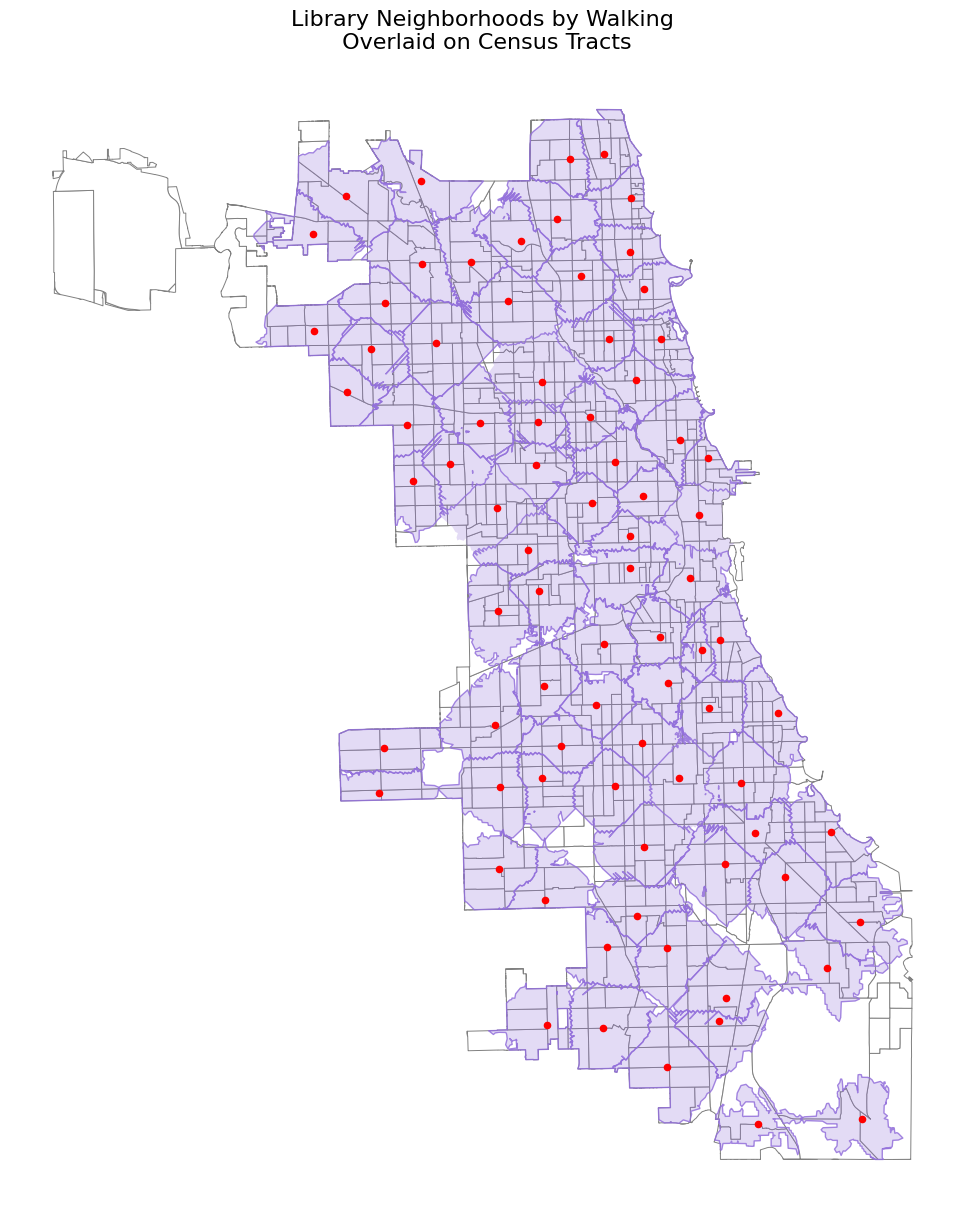

In [40]:
fig, ax = plt.subplots(1, figsize=(15, 15))
base = censusTracts.plot(ax=ax, color='white', edgecolor='gray', linewidth=.7)
ax.axis('off')

neighborhoodRadii = gpd.clip(neighborhoodRadii,censusTracts)

neighborhoodRadii.boundary.plot(ax=base, alpha = .85, color = 'mediumpurple', linewidth = 1)
neighborhoodRadii.plot(ax=base, alpha = .25, color = 'mediumpurple')

branchLocsOnly.plot(ax=base, marker='o', color='red', markersize=20)

ax.set_title('Library Neighborhoods by Walking\n Overlaid on Census Tracts', fontdict={'fontsize': '16', 'fontweight' : '3'})